In [1]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [3]:
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [22]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [23]:
train.shape

(115, 1)

In [24]:
test.shape

(29, 1)

In [25]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [26]:
trainX.shape

(113, 1)

In [28]:
trainX[0:6]

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557]], dtype=float32)

In [27]:
trainY.shape

(113,)

In [29]:
trainY[0:5]

array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984557],
      dtype=float32)

In [33]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [31]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_squared_error'])

In [34]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 3s - loss: 0.0387 - mean_squared_error: 0.0387
Epoch 2/100
 - 1s - loss: 0.0164 - mean_squared_error: 0.0164
Epoch 3/100
 - 1s - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 4/100
 - 1s - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 5/100
 - 1s - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 6/100
 - 1s - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 7/100
 - 1s - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 8/100
 - 1s - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 9/100
 - 1s - loss: 0.0052 - mean_squared_error: 0.0052
Epoch 10/100
 - 1s - loss: 0.0045 - mean_squared_error: 0.0045
Epoch 11/100
 - 1s - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 12/100
 - 1s - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 13/100
 - 1s - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 14/100
 - 1s - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 15/100
 - 1s - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 16/100
 - 1s - loss: 0.0027 - mean_squared_error: 0.0027
E

In [19]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainYI = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testYI = scaler.inverse_transform(testY)

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [20]:
print ("Score of RMSE train : {}".format(numpy.sqrt(mean_squared_error(trainY,numpy.squeeze(trainPredict)))))

Score of RMSE train : 0.05165375769138336


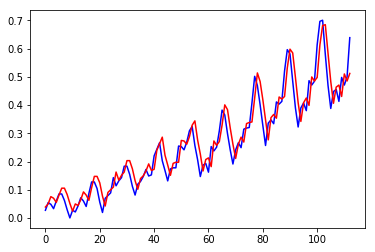

In [21]:
plt.plot(trainYI,c="blue")
plt.plot(trainPredict,c="red")
plt.show()